[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W13/W13P2.ipynb)



In [12]:
import os
#.from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [3]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")

download_data()

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'ch2data'

In [4]:
data = to_dataframe("q-ko-earns8309.txt")["value"]

In [5]:
data = data.apply(np.log)

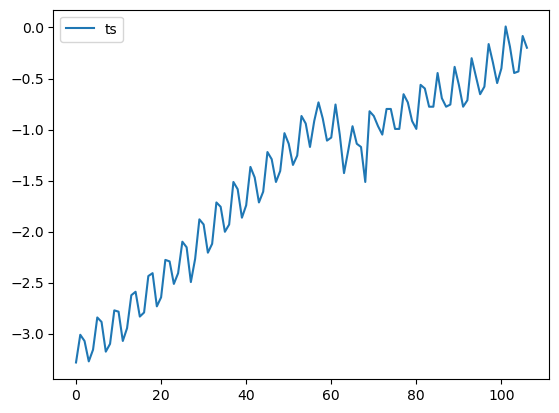

In [10]:
plt.plot(data, label = "ts")
plt.legend()
plt.show()

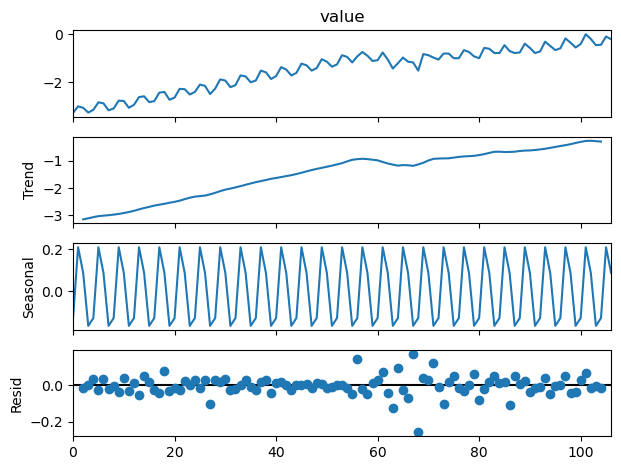

In [34]:
dec = sd(data, period= 4)
dec.plot();

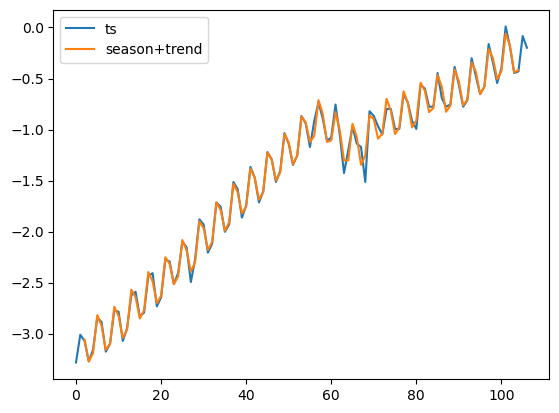

In [35]:
plt.plot(data, label = "ts")
plt.plot(dec.seasonal+dec.trend, label = "season+trend")
plt.legend()
plt.show()

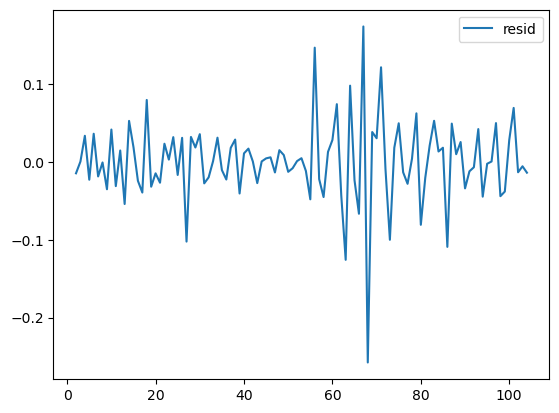

In [36]:
plt.plot(dec.resid, label = "resid")
plt.legend()
plt.show()

In [20]:
###Here the anomaly in the original series is inherited to the residual term.

In [21]:
def patch(ts:np.ndarray, m:int = 30, p:float = 2.0)->np.ndarray:
    L = []
    for i in range(ts.shape[0]-m-1):
        var = (abs(ts[i:i+m].std(ddof = 1)-ts[i+1:i+1+m].std(ddof = 1)))**p
        L.append(var)
    return np.asarray(L)
        
        

In [47]:
ts_ = patch(dec.resid, m = 15)

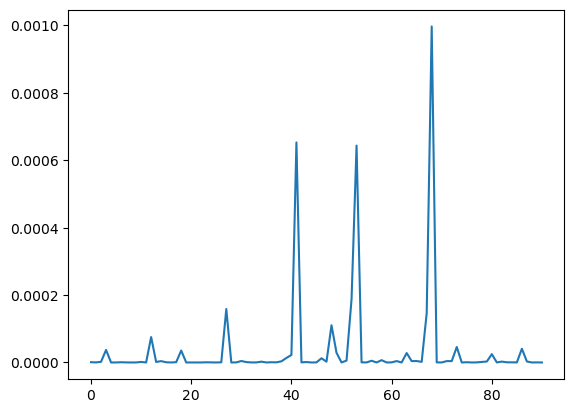

In [48]:
plt.plot(ts_)